<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Simulated_Annealing_Rastrigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

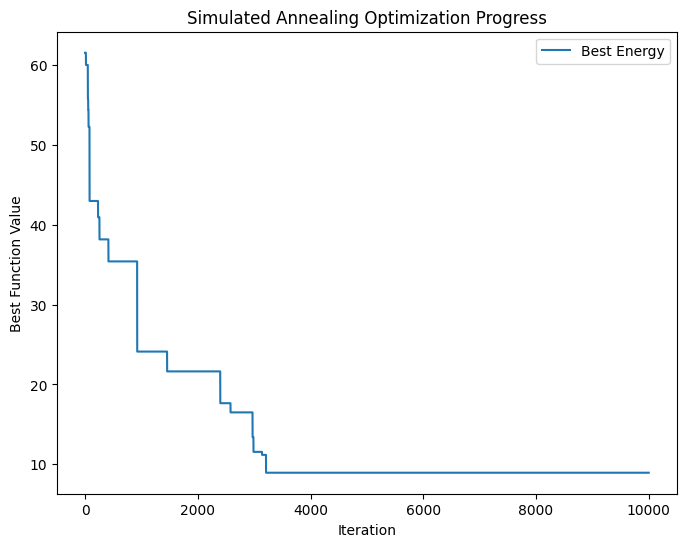

In [7]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def simulated_annealing_with_tracking(dim=4, bounds=[-5.12, 5.12], T0=1000, Tmin=1e-6, alpha=0.999, max_iter=10000):
    current_solution = np.random.uniform(bounds[0], bounds[1], dim)
    current_energy = rastrigin(current_solution)
    best_solution = current_solution.copy()
    best_energy = current_energy

    T = T0
    energy_history = []  # Store best energy over iterations

    for iteration in range(max_iter):
        new_solution = current_solution + np.random.uniform(-0.5, 0.5, dim)
        new_solution = np.clip(new_solution, bounds[0], bounds[1])

        new_energy = rastrigin(new_solution)

        delta_energy = new_energy - current_energy
        if delta_energy < 0 or random.uniform(0, 1) < math.exp(-delta_energy / T):
            current_solution, current_energy = new_solution, new_energy

        if current_energy < best_energy:
            best_solution, best_energy = current_solution.copy(), current_energy

        energy_history.append(best_energy)  # Track progress
        T *= alpha
        if T < Tmin:
            break

    return best_solution, best_energy, energy_history

# Run SA with tracking
best_sol, best_val, energy_history = simulated_annealing_with_tracking()

# Plot optimization progress
plt.figure(figsize=(8, 6))
plt.plot(energy_history, label="Best Energy")
plt.xlabel("Iteration")
plt.ylabel("Best Function Value")
plt.title("Simulated Annealing Optimization Progress")
plt.legend()
plt.show()